<a href="https://colab.research.google.com/github/Viswanathan25/Singapore-Flat-Prices-Prediction/blob/main/S_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn import preprocessing

In [10]:
#Collecting the datasets
df1 = pd.read_csv("/content/drive/MyDrive/Singapore datasets/singapore land sales/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Singapore datasets/singapore land sales/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Singapore datasets/singapore land sales/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Singapore datasets/singapore land sales/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv("/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards-1.csv")


In [11]:
#checking the data shapes
df = [df1,df2,df3,df4,df5]
for i in df:
  print(i.shape)

(287196, 10)
(369651, 10)
(52203, 10)
(37153, 11)
(173075, 11)


Merging the 5 Dataframes

In [12]:
#concating the all data frames into a single data frame
df = pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

Displaying the dataFrames

In [13]:
#Viewing head data
df.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
5,1990-01,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,46000.0,NaN
6,1990-01,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,07 TO 09,67.0,NEW GENERATION,1977,42000.0,NaN
7,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,10 TO 12,67.0,NEW GENERATION,1977,38000.0,NaN
8,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,04 TO 06,67.0,NEW GENERATION,1977,40000.0,NaN
9,1990-01,ANG MO KIO,3 ROOM,232,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,47000.0,NaN


In [14]:
#Displaying tail data
df.tail(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
919268,2024-02,YISHUN,5 ROOM,512C,YISHUN ST 51,10 TO 12,113.0,Improved,2017,750000.0,92 years 07 months
919269,2024-02,YISHUN,5 ROOM,502B,YISHUN ST 51,10 TO 12,112.0,Improved,2018,718000.0,93 years
919270,2024-02,YISHUN,5 ROOM,513A,YISHUN ST 51,01 TO 03,113.0,Improved,2018,600888.0,93 years 01 month
919271,2024-02,YISHUN,5 ROOM,758,YISHUN ST 72,10 TO 12,122.0,Improved,1986,700000.0,61 years 10 months
919272,2024-02,YISHUN,EXECUTIVE,405,YISHUN AVE 6,04 TO 06,142.0,Apartment,1988,780000.0,63 years 07 months
919273,2024-02,YISHUN,EXECUTIVE,325,YISHUN CTRL,04 TO 06,146.0,Maisonette,1988,860000.0,63 years 10 months
919274,2024-02,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,820000.0,63 years 05 months
919275,2024-02,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,795000.0,62 years 11 months
919276,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62 years 10 months
919277,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62 years 11 months


In [15]:
#Checking data shape and info
df.shape

(919278, 11)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919278 entries, 0 to 919277
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                919278 non-null  object 
 1   town                 919278 non-null  object 
 2   flat_type            919278 non-null  object 
 3   block                919278 non-null  object 
 4   street_name          919278 non-null  object 
 5   storey_range         919278 non-null  object 
 6   floor_area_sqm       919278 non-null  float64
 7   flat_model           919278 non-null  object 
 8   lease_commence_date  919278 non-null  int64  
 9   resale_price         919278 non-null  float64
 10  remaining_lease      210228 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.1+ MB


Checking missing values

In [17]:
#displaying Null values
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [18]:
#Droping the column
df = df.drop(columns ='remaining_lease')
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...
919273,2024-02,YISHUN,EXECUTIVE,325,YISHUN CTRL,04 TO 06,146.0,Maisonette,1988,860000.0
919274,2024-02,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,820000.0
919275,2024-02,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,795000.0
919276,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0


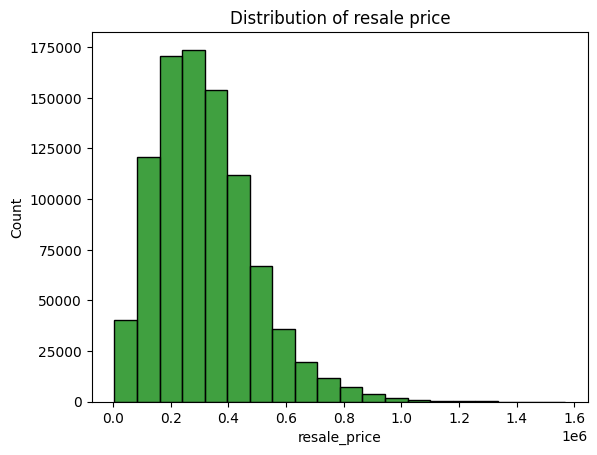

In [19]:
#Distribution of resale
snb.histplot(df['resale_price'], bins = 20, color='Green')
plt.title('Distribution of resale price')
plt.show()

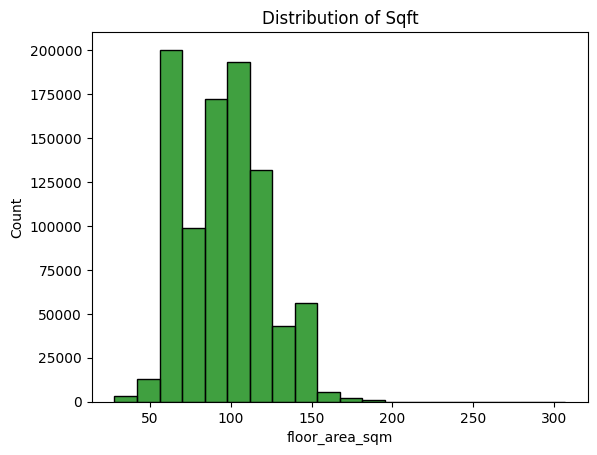

In [20]:
#Distribution of floor area
snb.histplot(df['floor_area_sqm'], bins = 20, color='Green')
plt.title('Distribution of Sqft')
plt.show()

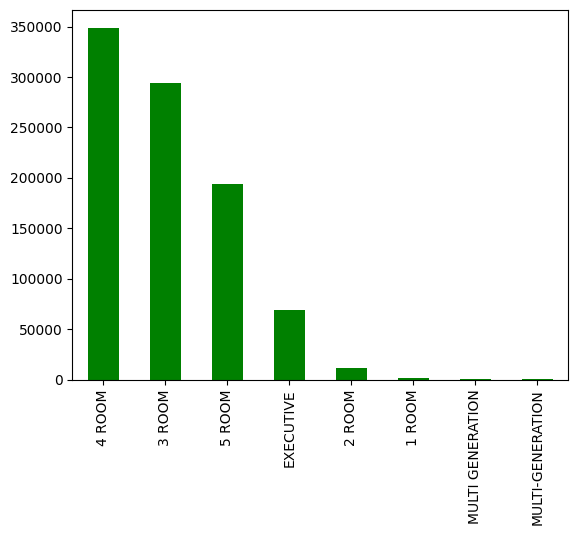

In [21]:
#Distribution of flat
df['flat_type'].value_counts().plot(kind = 'bar',color='Green')
plt.show()

Dealing with Features

In [22]:
#Flat type
df['flat_type'].value_counts()

4 ROOM              349015
3 ROOM              294005
5 ROOM              193631
EXECUTIVE            69181
2 ROOM               11606
1 ROOM                1300
MULTI GENERATION       279
MULTI-GENERATION       261
Name: flat_type, dtype: int64

In [23]:
# Unique lables in flat_type column
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

Encoding the flat type

In [24]:
# Assigning the value-pairs to be replaced
cat = {'1 ROOM': 1,
       '2 ROOM':2,
       '3 ROOM':3,
       '4 ROOM':4,
       '5 ROOM':5,
       'EXECUTIVE':6,
       'MULTI GENERATION':7}


In [25]:
# Replacing the values in df
df['flat_type'] = df['flat_type'].replace(cat)
df['flat_type'].value_counts()

4                   349015
3                   294005
5                   193631
6                    69181
2                    11606
1                     1300
7                      279
MULTI-GENERATION       261
Name: flat_type, dtype: int64

In [26]:
# Collapsing the flat_type categories
mapping={'MULTI-GENERATION':'MULTI GENERATION'}

df['flat_type'] = df['flat_type'].replace(mapping)
df['flat_type'].unique()

array([1, 3, 4, 5, 2, 6, 7, 'MULTI GENERATION'], dtype=object)

Dealing with flat type

In [27]:
# Flat_model column
print(df['flat_model'].nunique())
df['flat_model'].unique()

34


array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [28]:
#changing into small letters
df['flat_model'] = df['flat_model'].str.lower()

In [29]:
#flat_model value counts
df['flat_model'].value_counts()

model a                   262013
improved                  239947
new generation            188056
simplified                 57269
premium apartment          46006
standard                   42353
apartment                  35235
maisonette                 29481
model a2                   10051
dbss                        3231
model a-maisonette          2065
adjoined flat               1237
terrace                      690
multi generation             540
type s1                      430
type s2                      213
improved-maisonette          125
2-room                       117
premium apartment loft       107
premium maisonette            86
3gen                          26
Name: flat_model, dtype: int64

Encoding the flat model

In [30]:
ecode= preprocessing.LabelEncoder()

flat_modelcode= ecode.fit_transform(df['flat_model'])
df.insert(loc = 8,
          column = 'flat_modelcode',
          value = flat_modelcode)
df['flat_modelcode'].value_counts()

8     262013
5     239947
12    188056
16     57269
13     46006
17     42353
3      35235
7      29481
10     10051
4       3231
9       2065
2       1237
18       690
11       540
19       430
20       213
6        125
0        117
14       107
15        86
1         26
Name: flat_modelcode, dtype: int64

Town column

In [31]:
# Town column
df['town'].nunique()

27

In [32]:
#checking value counts
df['town'].value_counts()

TAMPINES           79380
YISHUN             69538
BEDOK              66271
JURONG WEST        66119
WOODLANDS          64982
ANG MO KIO         51795
HOUGANG            50309
BUKIT BATOK        43910
CHOA CHU KANG      37931
BUKIT MERAH        34053
PASIR RIS          33039
SENGKANG           31931
TOA PAYOH          31329
QUEENSTOWN         28580
GEYLANG            28012
CLEMENTI           27884
BUKIT PANJANG      27463
KALLANG/WHAMPOA    26934
JURONG EAST        24609
SERANGOON          22698
BISHAN             21162
PUNGGOL            20102
SEMBAWANG          13591
MARINE PARADE       8002
CENTRAL AREA        7090
BUKIT TIMAH         2500
LIM CHU KANG          64
Name: town, dtype: int64

In [33]:
# Creating a column with encoded value
town = ecode.fit_transform(df['town'])
df.insert(loc = 2,
          column = 'town_code',
          value = town)

In [34]:
# Encoded value count
df['town_code'].value_counts()

23    79380
26    69538
1     66271
13    66119
25    64982
0     51795
11    50309
3     43910
8     37931
4     34053
17    33039
21    31931
24    31329
19    28580
10    28012
9     27884
5     27463
14    26934
12    24609
22    22698
2     21162
18    20102
20    13591
16     8002
7      7090
6      2500
15       64
Name: town_code, dtype: int64

Spliting the columns

In [35]:
# Print header of column
df['storey_range'].head()

0    10 TO 12
1    04 TO 06
2    10 TO 12
3    07 TO 09
4    04 TO 06
Name: storey_range, dtype: object

In [36]:
# Splitting storey range column
storey=df['storey_range'].str.split(' TO ',expand = True)
storey.head()

,0,1
0,10,12
1,04,06
2,10,12
3,07,09
4,04,06


In [37]:
# Creating the storey minimum values as column
df.insert(loc = 6,
          column = 'storey_min',
          value = storey[0])
# Creating the storey maximum values as column
df.insert(loc = 7,
          column = 'storey_max',
          value = storey[1])

In [38]:
#Spliting the month columns
month=df['month'].str.split('-',expand = True)
month.head()

,0,1
0,1990,01
1,1990,01
2,1990,01
3,1990,01
4,1990,01


In [39]:
# Creating the year values as column
df.insert(loc = 1,
          column = 'selling_year',
          value = month[0])
# Creating the storey maximum values as column
df.insert(loc = 2,
          column = 'selling_month',
          value = month[1])

In [40]:
df = df[['selling_month', 'selling_year','town', 'town_code',	'flat_type',	'block',	'street_name',	'storey_min',
         'storey_max',	'storey_range',	'floor_area_sqm',	'flat_model',	'flat_modelcode',
         'lease_commence_date',	'resale_price' ]]

In [41]:
df.head()

,selling_month,selling_year,town,town_code,flat_type,block,street_name,storey_min,storey_max,storey_range,floor_area_sqm,flat_model,flat_modelcode,lease_commence_date,resale_price
0,01,1990,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,9000.0
1,01,1990,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,04,06,04 TO 06,31.0,improved,5,1977,6000.0
2,01,1990,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,8000.0
3,01,1990,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,07,09,07 TO 09,31.0,improved,5,1977,6000.0
4,01,1990,ANG MO KIO,0,3,216,ANG MO KIO AVE 1,04,06,04 TO 06,73.0,new generation,12,1976,47200.0


Checking Datatypes

In [42]:
df.dtypes

selling_month           object
selling_year            object
town                    object
town_code                int64
flat_type               object
block                   object
street_name             object
storey_min              object
storey_max              object
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int64
lease_commence_date      int64
resale_price           float64
dtype: object

In [50]:
#changing some dtype to numeric data
df_copy = df.copy()
df_copy['selling_month'] = df_copy['selling_month'].astype(int)
df_copy['selling_year'] = df_copy['selling_year'].astype(int)
df_copy['storey_min'] = df_copy['storey_min'].astype(int)
df_copy['storey_max'] = df_copy['storey_max'].astype(int)

In [51]:
df.dtypes

selling_month           object
selling_year            object
town                    object
town_code                int64
flat_type               object
block                   object
street_name             object
storey_min              object
storey_max              object
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int64
lease_commence_date      int64
resale_price           float64
dtype: object

Correlation Check

<ipython-input-54-333485647965>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'floor_area_sqm', 'flat_modelcode', 'lease_commence_date', 'resale_price']].dropna().corr()


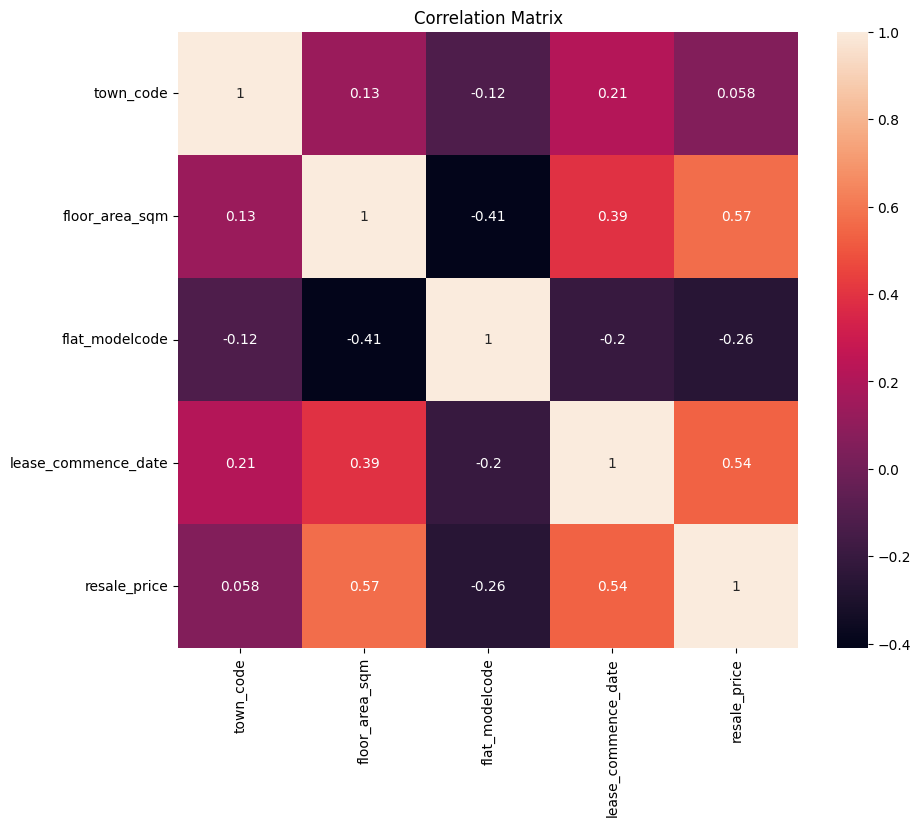

In [54]:
corr_df = df[['selling_month', 'selling_year', 'town_code', 'storey_min', 'storey_max',
              'floor_area_sqm', 'flat_modelcode', 'lease_commence_date', 'resale_price']].dropna().corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
snb.heatmap(corr_df,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [55]:
#downloading cleaned datasets
df.to_csv('final.csv',index=False)